# ESA descriptive analysis

Import all depencies

In [413]:
import pandas as pd
import numpy as np
import sklearn.cluster
import sklearn.decomposition
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network

import matplotlib.pyplot as plt

import os.path
import sys

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [414]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

%aimport features.normalizer
%aimport features.supervised
%aimport features.tools
%aimport data.tools
%aimport data.esa
%aimport models
%aimport visualization.simple

In [415]:
import data.esa

import features.normalizer
import features.tools
import features.supervised

import visualization.simple

read and clean data

In [416]:
data_frame, columns = data.esa.data_set()
data_frame.head()

,Date,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,199.5,1413.5,248.2,239.2,368.5,647.1,241.2,488.6,376.4,589.0
1,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,202.9,1457.1,247.9,240.0,373.2,655.4,241.5,487.0,377.4,620.6
2,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,206.9,1483.1,247.9,240.5,377.2,662.8,238.7,487.5,378.5,632.9
3,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,210.0,1475.9,247.6,242.3,379.8,667.8,247.8,493.8,379.7,614.5
4,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,211.9,1511.3,247.3,242.8,382.8,672.4,246.8,494.1,381.1,636.0


sum all sectors

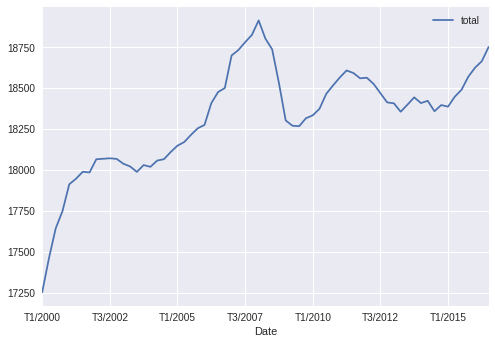

In [417]:
sum_data = data_frame.copy().drop("Date", axis=1).sum(axis=1)
sum_data = pd.concat([sum_data, data_frame[["Date"]]], axis=1)
sum_data.columns = ["total", "Date"]

visualization.simple.temporal(sum_data)

extract 4 ranges and and compute sum of them

In [418]:
d1 = pd.DataFrame(data_frame.head(16).sum(axis=0)).transpose()
d2 = pd.DataFrame(data_frame.iloc[48:64].sum(axis=0)).transpose()
d3 = pd.DataFrame(data_frame.iloc[16:32].sum(axis=0)).transpose()
d4 = pd.DataFrame(data_frame.iloc[32:48].sum(axis=0)).transpose()
q_data = pd.concat([d1, d3, d4, d2]).reset_index(drop=True)
q_data = q_data.drop("Date", axis=1)
q_data.head()

,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,ESA_AJ,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,560.5,9366,3747.3,4709.5,206.8,2932.8,1392.7,5816.7,8188.1,2960.4,...,3385.4,23806.6,3956.9,3984.3,6294.7,11057.9,3935.9,8010.5,6237.5,9377.3
1,455.9,9200.2,2684.5,4153.3,211.5,2677.4,1432,5465.6,7425.3,2636.1,...,3542.7,25592.3,3757.8,4340.6,7070.4,12414.5,3913.3,8213.3,7213.5,9803.4
2,404.6,8869.4,1998.9,3566.1,185.2,2364.5,1362.2,4904.9,6701.1,2333.5,...,3374.9,25772.4,3710.7,4713,7635.1,13903.1,4268.7,8665.5,7881.5,8845.7
3,361.3,8785.9,1716.8,3100.2,157.8,2257.8,1284.4,4430.2,6269.9,2183,...,3300.9,26148,3533.5,4925.6,7988.6,15151.4,4445.2,8821.4,7248.4,8573.8


## jobs by sectors

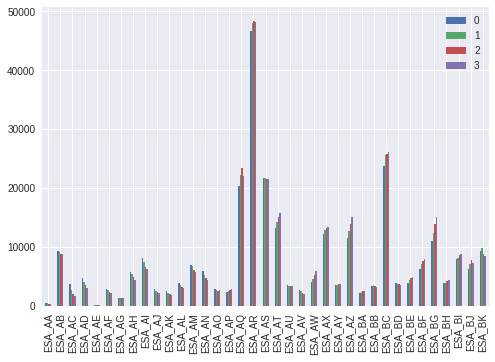

In [419]:
d = q_data.copy().transpose()

visualization.simple.bar(d)

## Percentage of jobs by sectors

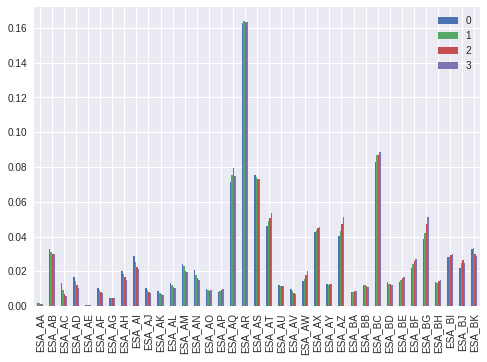

In [420]:
n_data = d / d.sum()

visualization.simple.bar(n_data)

# Correlation of all sectors

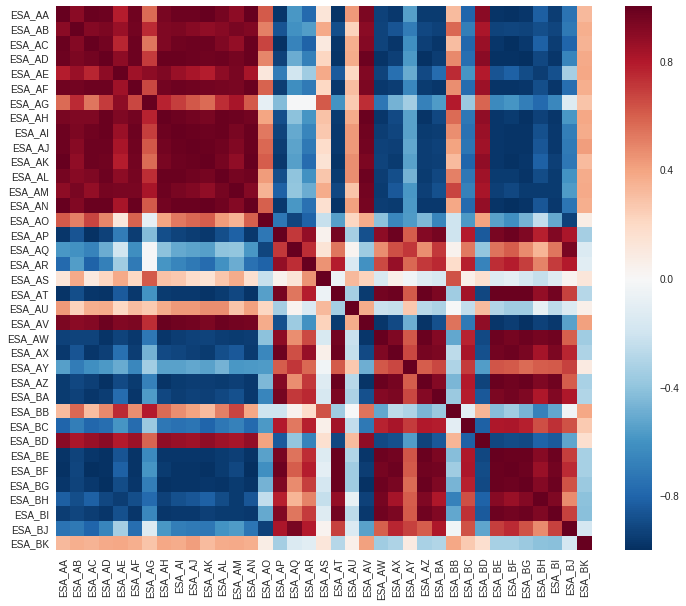

In [421]:
corr = data_frame.corr()

visualization.simple.heat_map(corr, corr.columns.values, corr.columns.values, (12, 10))

In [422]:
wd_data = data_frame.copy().drop("Date", axis=1)
norm_data = features.normalizer.simple_min_max(wd_data)
#norm_data = d_c / d_c.sum()
norm_data = pd.concat([data_frame[["Date"]], norm_data], axis=1)

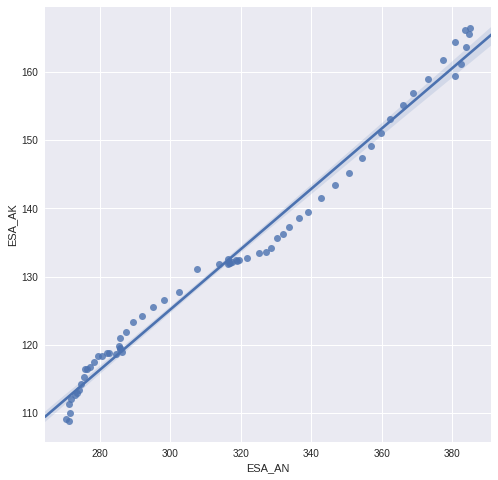

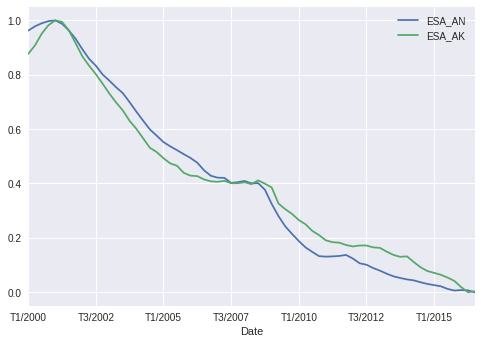

In [423]:
visualization.simple.linear_regression(data_frame, "ESA_AN", "ESA_AK", (8, 8))
visualization.simple.temporal(norm_data, ["ESA_AN", "ESA_AK"])

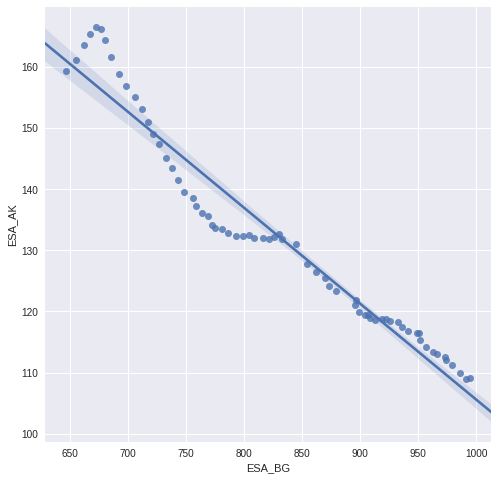

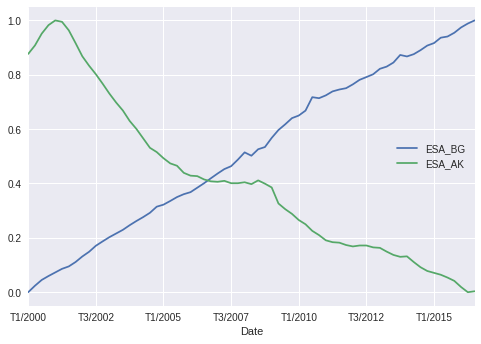

In [424]:
visualization.simple.linear_regression(data_frame, "ESA_BG", "ESA_AK", (8, 8))
visualization.simple.temporal(norm_data, ["ESA_BG", "ESA_AK"])

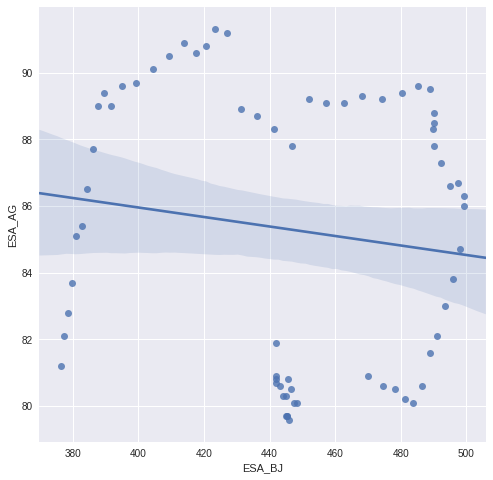

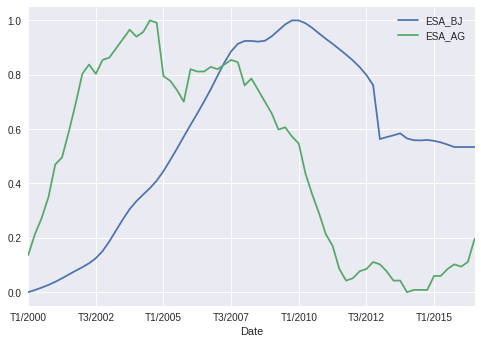

In [425]:
visualization.simple.linear_regression(data_frame, "ESA_BJ", "ESA_AG", (8, 8))
visualization.simple.temporal(norm_data, ["ESA_BJ", "ESA_AG"])

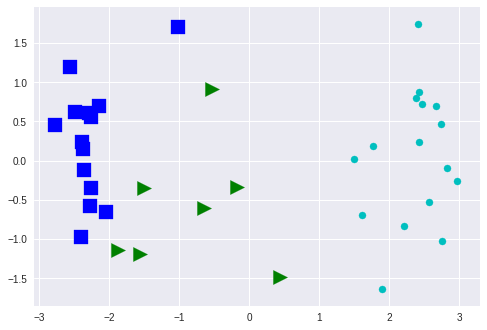

In [426]:
s_data = norm_data.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

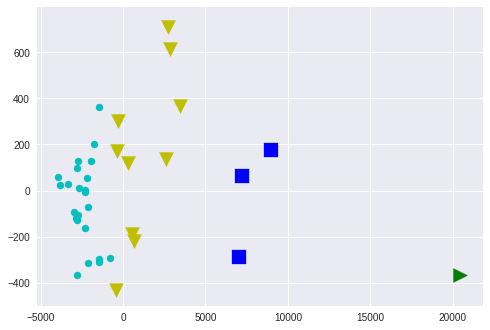

In [427]:
s_data = data_frame.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

In [428]:
s_data = wd_data / wd_data.sum() * 10
s_data = s_data.transpose()
s_data = (s_data - s_data.min()) / (s_data.max() - s_data.min())
s_data = s_data.transpose()
s_data.head()

,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,ESA_AJ,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,0.648719,0.307047,1.0,0.558347,0.346790,0.481407,0.238603,0.423367,0.436437,0.484088,...,0.225055,0.170895,0.362265,0.125027,0.084654,0.054692,0.212024,0.209599,0.121490,0.320463
1,0.648113,0.303851,1.0,0.563055,0.375316,0.470557,0.236145,0.426913,0.439318,0.504072,...,0.228142,0.184458,0.351866,0.108967,0.075256,0.043658,0.197853,0.190623,0.104612,0.371671
2,0.645908,0.293461,1.0,0.564504,0.374369,0.456756,0.228230,0.428751,0.452399,0.524801,...,0.232358,0.183671,0.339809,0.087410,0.060346,0.027420,0.165779,0.171991,0.083665,0.385830
3,0.636852,0.277770,1.0,0.566116,0.369608,0.444516,0.217808,0.429730,0.454936,0.538578,...,0.227199,0.151987,0.320945,0.063859,0.034448,0.000076,0.182223,0.160113,0.055325,0.331227
4,0.632817,0.276237,1.0,0.566752,0.348108,0.444382,0.235698,0.434079,0.467743,0.549937,...,0.235806,0.176026,0.318387,0.060217,0.036345,0.000000,0.173750,0.156806,0.053251,0.378063


In [429]:
input_data, output_data = features.supervised.to_time(s_data, 12, 5)

In [430]:
input_data.head(5)

,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,ESA_AJ,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,"[0.648718510411, 0.648113160342, 0.64590845756...","[0.307047266772, 0.303850876875, 0.29346071886...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.558347416561, 0.5630548545, 0.564504147461,...","[0.346790461563, 0.375315757899, 0.37436858978...","[0.481406716785, 0.470557033917, 0.45675582427...","[0.238603198163, 0.236144669234, 0.22823026053...","[0.423366542155, 0.426913012598, 0.42875088111...","[0.436436831852, 0.439317501604, 0.45239948247...","[0.484088098384, 0.504071642207, 0.52480125392...",...,"[0.225055465236, 0.22814241039, 0.232358259906...","[0.170894543288, 0.184458451297, 0.18367066821...","[0.362265427085, 0.351866182806, 0.33980922809...","[0.125027261737, 0.108967268932, 0.08740998489...","[0.0846541575999, 0.0752560704571, 0.060346224...","[0.054691706133, 0.0436584339488, 0.0274203779...","[0.212024338652, 0.197852833077, 0.16577894287...","[0.20959935804, 0.190622987961, 0.171991044787...","[0.121489756648, 0.104612356826, 0.08366533046...","[0.320463492308, 0.371670512918, 0.38582978502..."
1,"[0.648113160342, 0.645908457564, 0.63685150727...","[0.303850876875, 0.293460718869, 0.27776962876...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.5630548545, 0.564504147461, 0.566115655132,...","[0.375315757899, 0.37436858978, 0.369607967218...","[0.470557033917, 0.456755824272, 0.44451581096...","[0.236144669234, 0.228230260531, 0.21780769914...","[0.426913012598, 0.42875088111, 0.429730139727...","[0.439317501604, 0.452399482476, 0.45493619830...","[0.504071642207, 0.524801253924, 0.53857769743...",...,"[0.22814241039, 0.232358259906, 0.227198952302...","[0.184458451297, 0.183670668219, 0.15198661393...","[0.351866182806, 0.339809228093, 0.32094511287...","[0.108967268932, 0.0874099848976, 0.0638586681...","[0.0752560704571, 0.0603462246521, 0.034447938...","[0.0436584339488, 0.0274203779112, 7.600137428...","[0.197852833077, 0.165778942879, 0.18222323012...","[0.190622987961, 0.171991044787, 0.16011293144...","[0.104612356826, 0.0836653304605, 0.0553248403...","[0.371670512918, 0.38582978502, 0.331226741784..."
2,"[0.645908457564, 0.636851507279, 0.63281684592...","[0.293460718869, 0.277769628765, 0.27623700318...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.564504147461, 0.566115655132, 0.56675214945...","[0.37436858978, 0.369607967218, 0.348107597987...","[0.456755824272, 0.444515810963, 0.44438180233...","[0.228230260531, 0.21780769914, 0.235697874408...","[0.42875088111, 0.429730139727, 0.434078750342...","[0.452399482476, 0.454936198303, 0.46774309214...","[0.524801253924, 0.538577697433, 0.54993708591...",...,"[0.232358259906, 0.227198952302, 0.23580622728...","[0.183670668219, 0.151986613935, 0.17602614537...","[0.339809228093, 0.32094511287, 0.318386946861...","[0.0874099848976, 0.0638586681861, 0.060217342...","[0.0603462246521, 0.0344479384242, 0.036344543...","[0.0274203779112, 7.60013742869e-05, 0.0, 0.0,...","[0.165778942879, 0.182223230122, 0.17374997228...","[0.171991044787, 0.160112931448, 0.15680588864...","[0.0836653304605, 0.0553248403773, 0.053251372...","[0.38582978502, 0.331226741784, 0.378063243623..."
3,"[0.636851507279, 0.632816845927, 0.65152226974...","[0.277769628765, 0.276237003185, 0.28260724276...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.566115655132, 0.566752149453, 0.57723877681...","[0.369607967218, 0.348107597987, 0.34389990817...","[0.444515810963, 0.444381802331, 0.45118500710...","[0.21780769914, 0.235697874408, 0.242707411215...","[0.429730139727, 0.434078750342, 0.44832520121...","[0.454936198303, 0.467743092143, 0.48352543837...","[0.538577697433, 0.549937085911, 0.56102454881...",...,"[0.227198952302, 0.235806227285, 0.24004299669...","[0.151986613935, 0.176026145374, 0.16506555485...","[0.32094511287, 0.318386946861, 0.319052040343...","[0.0638586681861, 0.0602173426722,

In [431]:
output_data.head()

,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,ESA_AJ,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,[0.641646770496],[0.495086157844],[1.0],[0.770717212884],[0.845525432529],[0.689344117672],[0.567065495308],[0.667963929162],[0.609173101737],[0.573617322743],...,[0.526849082697],[0.29566370151],[0.500126962476],[0.199564901283],[0.214364143429],[0.130571711492],[0.199016635363],[0.296525277176],[0.248052078198],[0.395250647176]
1,[0.66609360798],[0.51762047529],[1.0],[0.810786341972],[0.941730094853],[0.725445472348],[0.632658580849],[0.708587951908],[0.636217627335],[0.605163748991],...,[0.597810725634],[0.334352320523],[0.524142231868],[0.227985517933],[0.253250378777],[0.162009846254],[0.222822547095],[0.313923332452],[0.288870187021],[0.451177368467]
2,[0.658497109975],[0.537271443838],[0.978894520161],[0.827037146869],[1.0],[0.749518178916],[0.663140492772],[0.735238583317],[0.649937211056],[0.621514363869],...,[0.662141473623],[0.360563154902],[0.551005045381],[0.237884964735],[0.286350386986],[0.187888200673],[0.229454406039],[0.322429089184],[0.319203269272],[0.503459832219]
3,[0.658156360947],[0.532740363863],[0.911023274687],[0.815513897931],[1.0],[0.712827836699],[0.58860887001],[0.735064689882],[0.625550388339],[0.61273591479],...,[0.682559496628],[0.383871846615],[0.549040062258],[0.256718099812],[0.291546657038],[0.187329432452],[0.222038583397],[0.325944193929],[0.345438697372],[0.545917493686]
4,[0.653665288693],[0.555519676975],[0.894431591921],[0.8459704342],[1.0],[0.733666495323],[0.619026145002],[0.772430711572],[0.645616534475],[0.638620457061],...,[0.723295568354],[0.398960553823],[0.561170003799],[0.273383872574],[0.314423352448],[0.195139492183],[0.213885804441],[0.331115415206],[0.393408971077],[0.574272914304]


In [432]:
output_1d = features.tools.to_1d(output_data)
output_1d.head()

,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,ESA_AJ,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,0.641647,0.495086,1.000000,0.770717,0.845525,0.689344,0.567065,0.667964,0.609173,0.573617,...,0.526849,0.295664,0.500127,0.199565,0.214364,0.130572,0.199017,0.296525,0.248052,0.395251
1,0.666094,0.517620,1.000000,0.810786,0.941730,0.725445,0.632659,0.708588,0.636218,0.605164,...,0.597811,0.334352,0.524142,0.227986,0.253250,0.162010,0.222823,0.313923,0.288870,0.451177
2,0.658497,0.537271,0.978895,0.827037,1.000000,0.749518,0.663140,0.735239,0.649937,0.621514,...,0.662141,0.360563,0.551005,0.237885,0.286350,0.187888,0.229454,0.322429,0.319203,0.503460
3,0.658156,0.532740,0.911023,0.815514,1.000000,0.712828,0.588609,0.735065,0.625550,0.612736,...,0.682559,0.383872,0.549040,0.256718,0.291547,0.187329,0.222039,0.325944,0.345439,0.545917
4,0.653665,0.555520,0.894432,0.845970,1.000000,0.733666,0.619026,0.772431,0.645617,0.638620,...,0.723296,0.398961,0.561170,0.273384,0.314423,0.195139,0.213886,0.331115,0.393409,0.574273


In [443]:
import itertools

input_f = features.tools.merge_all(input_data)

input_data2 = np.array(list(input_f["features"]))
output_data2 = np.array(list(output_data["ESA_AG"]))

output_data_1d = np.array(list(output_1d["ESA_AG"]))

x_train = input_data2[:40]
y_train = output_data2[:40]
y_train_1d = output_data_1d[:40]

In [444]:
perceptron = sklearn.tree.DecisionTreeRegressor(max_depth=2)
perceptron.fit(x_train, y_train)
y = perceptron.predict(input_data2)

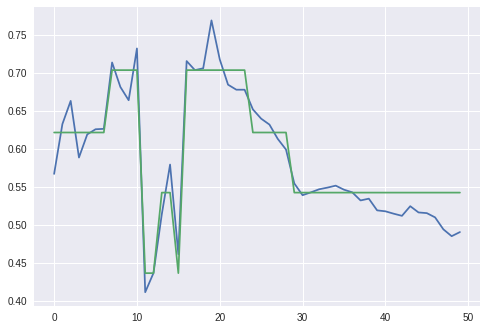

In [445]:
# Plot the results
plt.figure()
plt.plot(output_data2)
plt.plot(y)
plt.show()

In [446]:
perceptron = sklearn.linear_model.LinearRegression()
perceptron.fit(x_train, y_train)
y = perceptron.predict(input_data2)

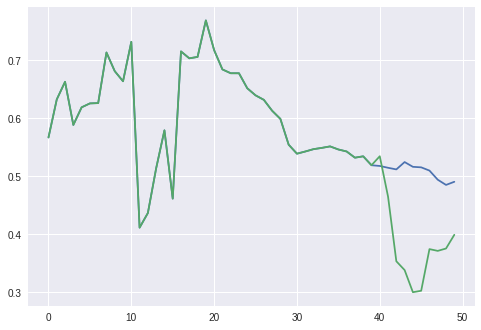

In [447]:
# Plot the results
plt.figure()
plt.plot(output_data2)
plt.plot(y)
plt.show()

In [448]:
perceptron = sklearn.linear_model.BayesianRidge(compute_score=True)
perceptron.fit(x_train, y_train_1d)
y = perceptron.predict(input_data2)

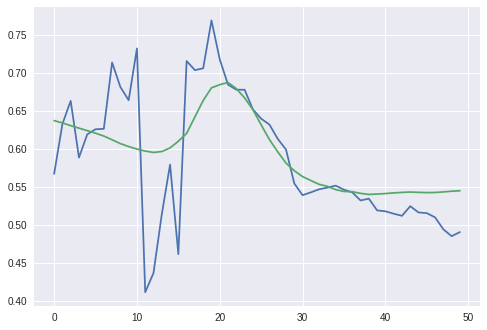

In [449]:
# Plot the results
plt.figure()
plt.plot(output_data2)
plt.plot(y)
plt.show()

In [450]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

xx_train = x_train
yy_train = y_train

def baseline_model():
    model = Sequential()
    model.add(Dense(444, input_dim=444, kernel_initializer='normal', activation='relu'))
    model.add(Dense(200, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#xx_train = features.tools.columns_as_rows(input_data)
#yy_train = features.tools.columns_as_rows(output_data)

#xx_train = np.array(list(xx_train["features"]))
#yy_train = np.array(list(yy_train["features"]))

print (len(xx_train[0]))

model = baseline_model()
model.fit(xx_train, yy_train, batch_size=20, epochs=150, verbose=0)

444


In [451]:
input_data3 = np.array(list(input_data["ESA_AB"]))
y = model.predict(input_data2, batch_size=128)

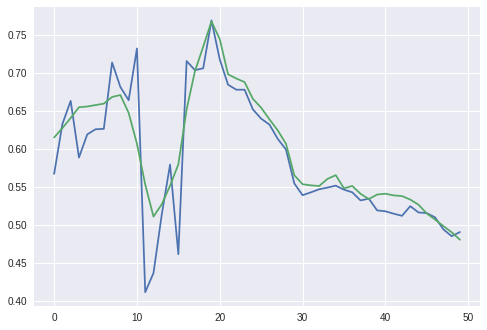

In [452]:
# Plot the results
plt.figure()
plt.plot(output_data2)
plt.plot(y)
plt.show()